## Setting up

### Import pandas and read in the csv file and set it to a dataframe called baskets

In [154]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt


###  unanswered questions from last notebook
 - should we remove the duplicates? 
 - what should we do about nulls in the data?

### the remaining questions may need business answer that we are not able to answer by data alone
 - ID columns' statistics make sense other than count, min, max, since they are supposed to be identifiers, should we treat them as categorical?
 - why would some items have price of 0?
 - unique placed_at is one greater than unique order_id, is it possible that two orders are made on exactly the same milisecond? In theory it is possible, but might there be potential fraud?

### plan for this notebook to work on:
 - should we remove the duplicates? 
 - what should we do about nulls in the data?
 - answer some questions regarding merchants:
   - distribution of number of merchants by months
   - distribution of number of merchants by weekday
   - distribution of number of merchants by the number of orders they made
   - distribution of number of merchants by the number of distinct SKUs they buy

### read in data, make columns for date, year, month, day, hour, weekday, from the "placed_at" column 

In [155]:
filename = '../../dslc_prep/baskets_sample_random_10_20220820.csv'
#filename = '../../dslc_prep/baskets_sample_top_250_20220902.csv'
baskets = pd.read_csv(filename)

### Simple summaries of one dimension

In [156]:
baskets.price.describe()

count    2.930500e+04
mean     1.379133e+05
std      1.355361e+05
min      0.000000e+00
25%      4.550000e+04
50%      1.070000e+05
75%      1.845000e+05
max      2.175000e+06
Name: price, dtype: float64

<AxesSubplot:>

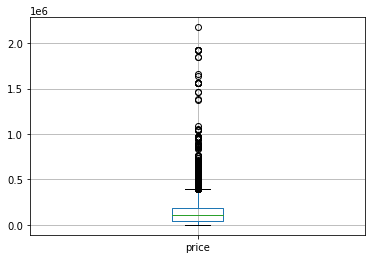

In [157]:
baskets.boxplot(column = 'price')


 - we can immediately see that the price has outliers
 - question: where should we cut to separate outliers from the regular items?

<AxesSubplot:>

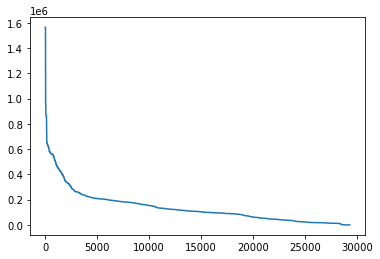

In [158]:
baskets.price.sort_values(ascending = False).reset_index(drop=True)[10:].plot()

<AxesSubplot:ylabel='Density'>

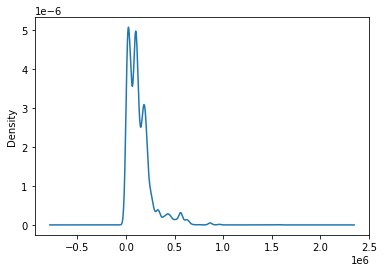

In [159]:
baskets.price.sort_values(ascending = False).reset_index(drop=True)[10:].plot.density()

<AxesSubplot:>

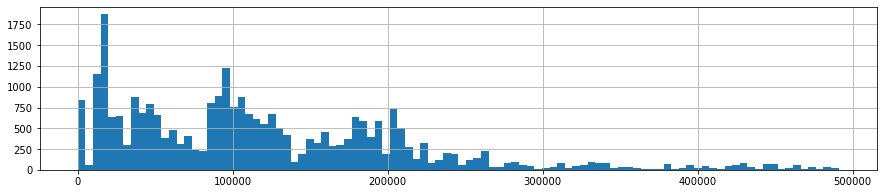

In [160]:
plt.figure(figsize=(15,3)) 
baskets.price.sort_values(ascending = False).reset_index(drop=True)[1000:].hist(bins=100)

In [161]:
baskets['datetime'] = baskets['placed_at'].apply(lambda x: datetime.fromisoformat(x))

#pandas.Series.dt is an interface on a pandas series that gives you convenient access to operations on data stored as a pandas datetime. 
baskets['date'] = baskets['datetime'].dt.date
baskets['year'] = baskets['datetime'].dt.year
baskets['month'] = baskets['datetime'].dt.month
baskets['day'] = baskets['datetime'].dt.day
baskets['hour'] = baskets['datetime'].dt.hour
baskets['weekday'] = baskets['datetime'].dt.weekday
baskets.head(3)

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,day,hour,weekday
0,126,23,2021-05-05 11:04:46.579,10,341,3.0,47.0,100,0.0,2021-05-05 11:04:46.579,2021-05-05,2021,5,5,11,2
1,166,41,2021-05-06 10:45:02.448,196,341,3.0,47.0,2,0.0,2021-05-06 10:45:02.448,2021-05-06,2021,5,6,10,3
2,167,42,2021-05-06 10:45:04.850,196,341,3.0,47.0,2,0.0,2021-05-06 10:45:04.850,2021-05-06,2021,5,6,10,3


### make a column of "spent" from columns "qnt" (quantity) and "price"

In [162]:
baskets["spent"] = baskets["qty"] * baskets["price"]
baskets.head(100)

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,day,hour,weekday,spent
0,126,23,2021-05-05 11:04:46.579,10,341,3.0,47.0,100,0.0,2021-05-05 11:04:46.579,2021-05-05,2021,5,5,11,2,0.0
1,166,41,2021-05-06 10:45:02.448,196,341,3.0,47.0,2,0.0,2021-05-06 10:45:02.448,2021-05-06,2021,5,6,10,3,0.0
2,167,42,2021-05-06 10:45:04.850,196,341,3.0,47.0,2,0.0,2021-05-06 10:45:04.850,2021-05-06,2021,5,6,10,3,0.0
3,168,43,2021-05-06 10:48:00.927,197,457,12.0,30.0,20,0.0,2021-05-06 10:48:00.927,2021-05-06,2021,5,6,10,3,0.0
4,169,44,2021-05-06 10:51:28.980,198,341,3.0,47.0,5,0.0,2021-05-06 10:51:28.980,2021-05-06,2021,5,6,10,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2029,344,2021-06-15 09:57:31.177,349,233,16.0,87.0,1,0.0,2021-06-15 09:57:31.177,2021-06-15,2021,6,15,9,1,0.0
96,2030,344,2021-06-15 09:57:31.177,349,287,14.0,37.0,2,83500.0,2021-06-15 09:57:31.177,2021-06-15,2021,6,15,9,1,167000.0
97,2031,344,2021-06-15 09:57:31.177,349,556,15.0,97.0,3,52500.0,2021-06-15 09:57:31.177,2021-06-15,2021,6,15,9,1,157500.0
98,2032,344,2021-06-15 09:57:31.177,349,114,25.0,106.0,1,121000.0,2021-06-15 09:57:31.177,2021-06-15,2021,6,15,9,1,121000.0


### which merchants have the most orders

In [163]:
baskets.groupby(['merchant_id']).order_id.nunique().sort_values(ascending = False)


merchant_id
488     155
398     154
951     154
1951    153
1067    144
       ... 
1811      1
1806      1
1799      1
1796      1
3160      1
Name: order_id, Length: 317, dtype: int64

In [164]:
baskets.groupby(['merchant_id']).spent.sum().sort_values(ascending = False)


merchant_id
488     1.416061e+09
352     1.338679e+09
134     8.709325e+08
664     4.993791e+08
168     4.663072e+08
            ...     
1811    1.100000e+05
1402    1.080000e+05
1608    8.000000e+04
1853    7.500000e+04
1806    6.760000e+04
Name: spent, Length: 317, dtype: float64

In [165]:
baskets.groupby(['merchant_id']).date.nunique().sort_values(ascending = False)

merchant_id
398     142
1067    118
488     116
496     116
352     113
       ... 
1573      1
1608      1
1635      1
2172      1
3160      1
Name: date, Length: 317, dtype: int64

In [166]:
merchants = baskets.groupby(['merchant_id']).agg({'spent': 'sum', 'order_id': 'nunique', 'date': 'nunique', 'sku_id':'nunique', 'top_cat_id':'nunique', 'sub_cat_id':'nunique'}).reset_index()
#merchants[merchants.merchant_id == 488]

<AxesSubplot:>

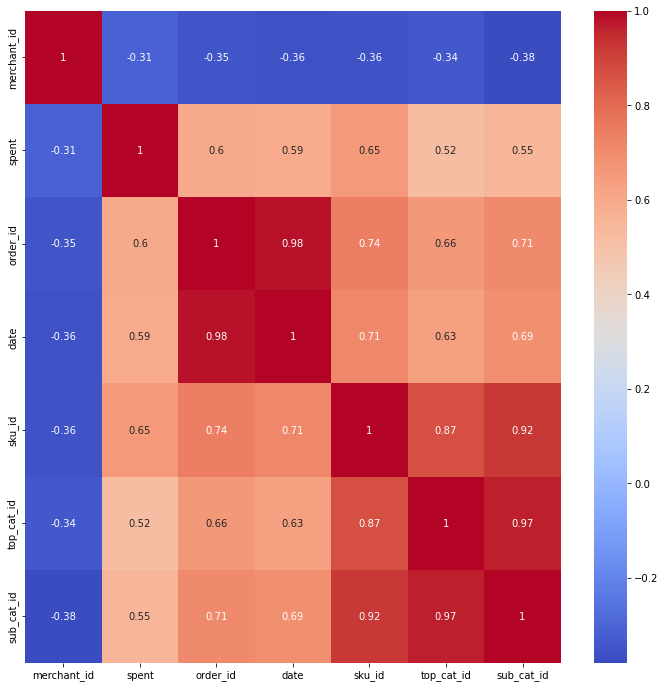

In [167]:
#Correlation plot
plt.figure(figsize=(12,12)) 
sns.heatmap(merchants.corr(),annot=True, cmap='coolwarm')


### for merchant 488, what are the top SKU in terms of quantities

In [168]:
df = baskets[baskets['merchant_id']==488].groupby(by=['sku_id']).sum().qty.sort_values(ascending = False).reset_index()
df

,sku_id,qty
0,2370,9000
1,1896,5800
2,634,3673
3,824,3525
4,1569,2400
...,...,...
201,822,1
202,1543,1
203,1004,1
204,1022,1


### study merchant 488 on its behavior on top SKUs

In [169]:
baskets[(baskets['merchant_id'] ==488) & (baskets['sku_id'].isin(df['sku_id'].head(3)))]

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,day,hour,weekday,spent
6003,66391,8131,2021-10-25 11:59:49.870,488,634,3.0,10.0,400,13750.0,2021-10-25 11:59:49.870,2021-10-25,2021,10,25,11,0,5500000.0
7446,81699,10581,2021-11-03 13:51:42.513,488,634,3.0,10.0,200,13500.0,2021-11-03 13:51:42.513,2021-11-03,2021,11,3,13,2,2700000.0
9218,101290,13911,2021-11-15 20:47:48.849,488,634,3.0,10.0,200,13500.0,2021-11-15 20:47:48.849,2021-11-15,2021,11,15,20,0,2700000.0
10285,114585,16510,2021-11-25 08:27:41.240,488,634,3.0,10.0,200,13000.0,2021-11-25 08:27:41.240,2021-11-25,2021,11,25,8,3,2600000.0
10497,117237,17448,2021-11-26 13:24:47.930,488,634,3.0,10.0,198,13000.0,2021-11-26 13:24:47.930,2021-11-26,2021,11,26,13,4,2574000.0
11884,131286,20051,2021-12-06 10:34:55.199,488,634,3.0,10.0,100,13000.0,2021-12-06 10:34:55.199,2021-12-06,2021,12,6,10,0,1300000.0
12993,142758,22438,2021-12-15 09:27:53.871,488,634,3.0,10.0,200,13000.0,2021-12-15 09:27:53.871,2021-12-15,2021,12,15,9,2,2600000.0
14371,155937,25333,2021-12-27 09:56:41.842,488,634,3.0,10.0,200,13000.0,2021-12-27 09:56:41.842,2021-12-27,2021,12,27,9,0,2600000.0
15332,166128,27200,2022-01-05 08:27:48.485,488,634,3.0,10.0,100,13000.0,2022-01-05 08:27:48.485,2022-01-05,2022,1,5,8,2,1300000.0
17317,187525,31733,2022-01-22 08:03:56.507,488,634,3.0,10.0,100,13000.0,2022-01-22 08:03:56.507,2022-01-22,2022,1,22,8,5,1300000.0


### this merchant's top sku purchased are 
 -  vegetable oils - top cat 4 is "ingredients" (bahan masakan) and sub cat 57 is "grilled fish cake" )
 -  beer  - top cat 3 is "food material" (bahan makanan) and sub cat 10 is "beer" (bir))

In [170]:
df = baskets[baskets.merchant_id==488].groupby(['sku_id'], as_index=False).agg({'month': ['nunique', 'min', 'max']}).reset_index()

In [171]:
baskets.groupby(['year','month']).sum().spent

year  month
2021  5        4.147000e+06
      6        1.255803e+09
      7        1.570967e+08
      8        6.100565e+08
      9        4.189620e+08
      10       1.877908e+09
      11       1.967072e+09
      12       2.471344e+09
2022  1        1.745429e+09
      2        1.926420e+09
      3        1.557358e+09
      4        7.553505e+08
      5        4.563164e+08
      6        6.793734e+08
      7        5.923883e+08
Name: spent, dtype: float64

<AxesSubplot:xlabel='date'>

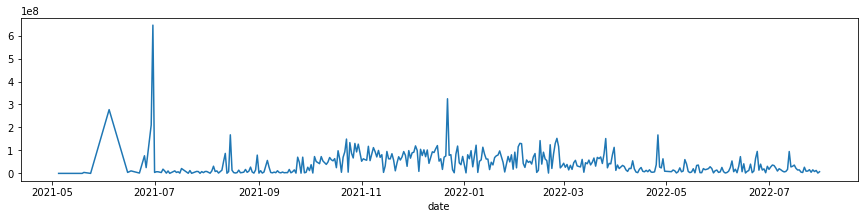

In [172]:
plt.figure(figsize=(15,3)) 
baskets.groupby(['date']).sum().spent.plot()

<AxesSubplot:xlabel='date'>

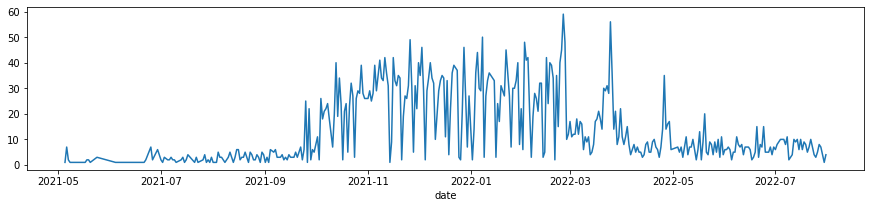

In [173]:
plt.figure(figsize=(15,3)) 
baskets.groupby(['date']).nunique().order_id.plot()

<AxesSubplot:xlabel='date'>

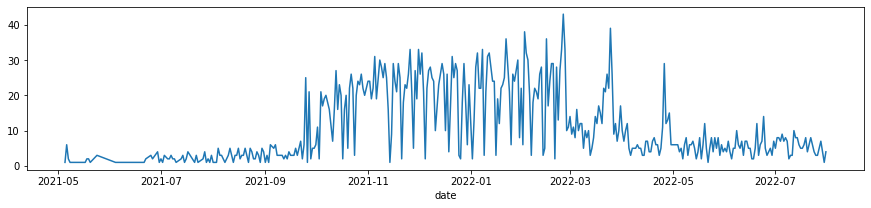

In [174]:
plt.figure(figsize=(15,3)) 
baskets.groupby(['date']).nunique().merchant_id.plot()

<AxesSubplot:xlabel='date'>

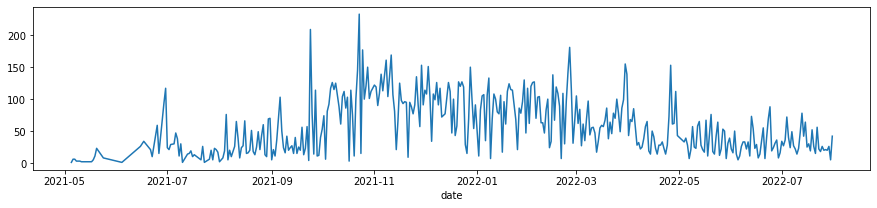

In [175]:
plt.figure(figsize=(15,3)) 
baskets.groupby(['date']).nunique().sku_id.plot()

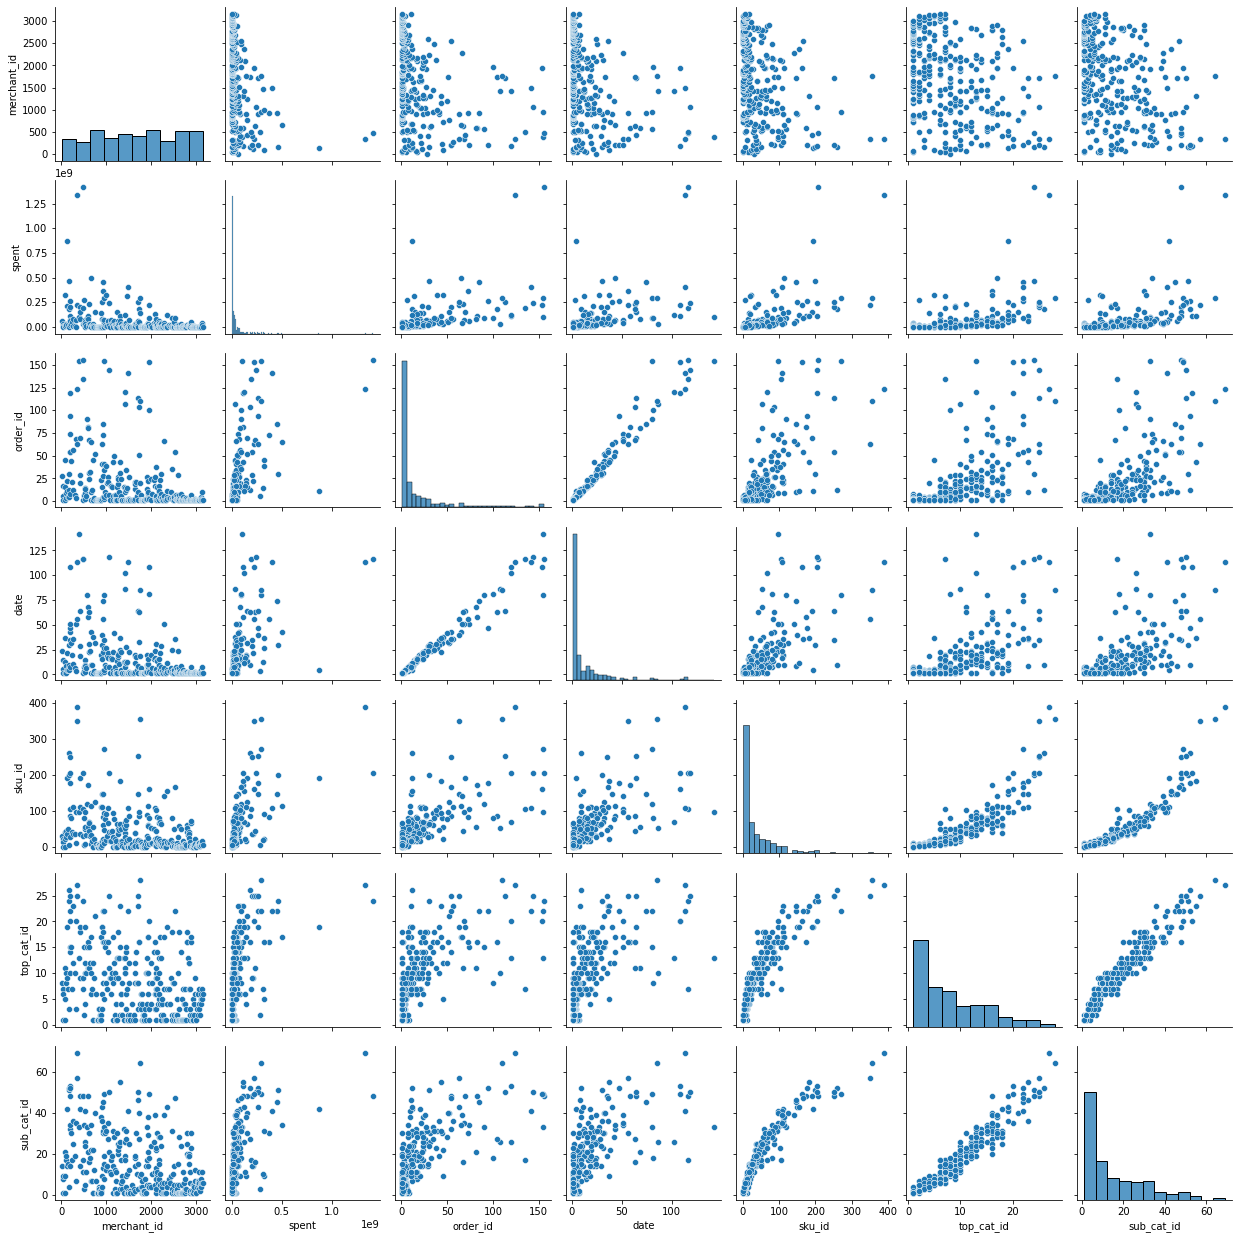

In [176]:
sns.pairplot(merchants)

 - for each merchant, how many items did they buy on December 31, 2021?
 - what did the merchant_id buy? on December 31, 2021?

We can see that there are 2208 null values in 'top_cat_id' and 'sub_cat_id'.

In [177]:
#Removing these null values
baskets.dropna(inplace=True)

In [178]:
baskets.isnull().sum()

id             0
order_id       0
placed_at      0
merchant_id    0
sku_id         0
top_cat_id     0
sub_cat_id     0
qty            0
price          0
datetime       0
date           0
year           0
month          0
day            0
hour           0
weekday        0
spent          0
dtype: int64

In [179]:
#Counting the frequency
freq = baskets['merchant_id'].value_counts()
print(freq)

352     1986
1753    1163
951      950
496      791
349      765
        ... 
1538       1
1536       1
1498       1
1494       1
1608       1
Name: merchant_id, Length: 317, dtype: int64


In [180]:
frequency_df = baskets.groupby(
    by=['merchant_id'], as_index=False)['date'].count()
frequency_df.columns = ['merchant_id', 'Frequency']
frequency_df.head()

,merchant_id,Frequency
0,10,52
1,39,36
2,45,14
3,46,1
4,80,61


In [181]:
merchant_sku = baskets.groupby(['merchant_id', 'sku_id', 'month'], as_index= True).agg({'count'})
merchant_sku

id order_id placed_at top_cat_id sub_cat_id   qty  \
                         count    count     count      count      count count   
merchant_id sku_id month                                                        
10          341    5         2        2         2          2          2     2   
            531    5         1        1         1          1          1     1   
            532    5         1        1         1          1          1     1   
            615    1         2        2         2          2          2     2   
                   11        1        1         1          1          1     1   
...                        ...      ...       ...        ...        ...   ...   
3160        962    7         1        1         1          1          1     1   
            1034   7         1        1         1          1          1     1   
            1591   7         1        1         1          1          1     1   
            1896   7         1        1         1          1          1     1   
            2147   7         1        1         1          1          1     1   

                         price datetime  date  year   day  hour weekday spent  
                         count    count count count count count   count count  
merchant_id sku_id month                                                       
10          341    5         2        2     2     2     2     2       2     2  
            531    5         1        1     1     1     1     1       1     1  
            532    5         1        1     1     1     1     1       1     1  
            615    1         2        2     2     2     2     2       2     2  
                   11        1        1     1     1     1     1       1     1  
...                        ...      ...   ...   ...   ...   ...     ...   ...  
3160        962    7         1        1     1     1     1     1       1     1  
            1034   7         1        1     1     1     1     1       1     1  
            1591   7         1        1     1     1     1     1       1     1  
            1896   7         1        1     1     1     1     1       1     1  
            2147   7         1        1     1     1     1     1       1     1  

[21862 rows x 14 columns]

In [182]:
merchant_sku = baskets.groupby(['merchant_id', 'sku_id'], as_index= True).agg({'count'})
merchant_sku

id order_id placed_at top_cat_id sub_cat_id   qty price  \
                   count    count     count      count      count count count   
merchant_id sku_id                                                              
10          341        2        2         2          2          2     2     2   
            531        1        1         1          1          1     1     1   
            532        1        1         1          1          1     1     1   
            615        4        4         4          4          4     4     4   
            616        1        1         1          1          1     1     1   
...                  ...      ...       ...        ...        ...   ...   ...   
3160        962        1        1         1          1          1     1     1   
            1034       1        1         1          1          1     1     1   
            1591       1        1         1          1          1     1     1   
            1896       1        1         1          1          1     1     1   
            2147       1        1         1          1          1     1     1   

                   datetime  date  year month   day  hour weekday spent  
                      count count count count count count   count count  
merchant_id sku_id                                                       
10          341           2     2     2     2     2     2       2     2  
            531           1     1     1     1     1     1       1     1  
            532           1     1     1     1     1     1       1     1  
            615           4     4     4     4     4     4       4     4  
            616           1     1     1     1     1     1       1     1  
...                     ...   ...   ...   ...   ...   ...     ...   ...  
3160        962           1     1     1     1     1     1       1     1  
            1034          1     1     1     1     1     1       1     1  
            1591          1     1     1     1     1     1       1     1  
            1896          1     1     1     1     1     1       1     1  
            2147          1     1     1     1     1     1       1     1  

[12814 rows x 15 columns]

In [183]:
baskets.price.median()

107000.0

Text(151709.60132720918, 3903.795, 'Mean: 137917.82')

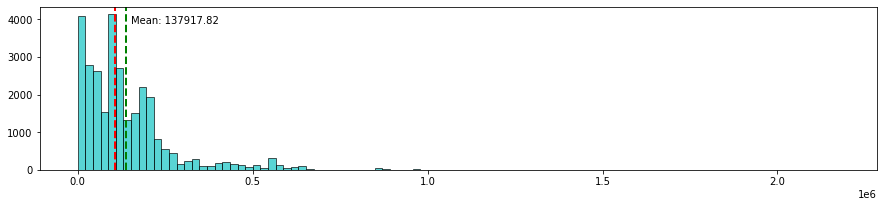

In [184]:
plt.figure(figsize=(15,3)) 
result = plt.hist(baskets.price, bins=100, color='c', edgecolor='k', alpha=0.65)
plt.axvline(baskets.price.mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(baskets.price.median(), color='r', linestyle='dashed', linewidth=2)


min_ylim, max_ylim = plt.ylim()
plt.text(baskets.price.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(baskets.price.mean()))

<AxesSubplot:>

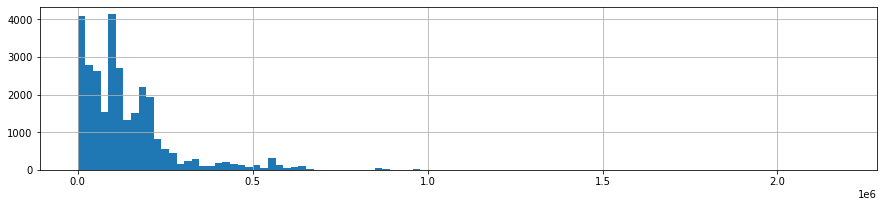

In [185]:
plt.figure(figsize=(15,3)) 
baskets.price.sort_values(ascending = False).reset_index(drop=True).hist(bins=100)

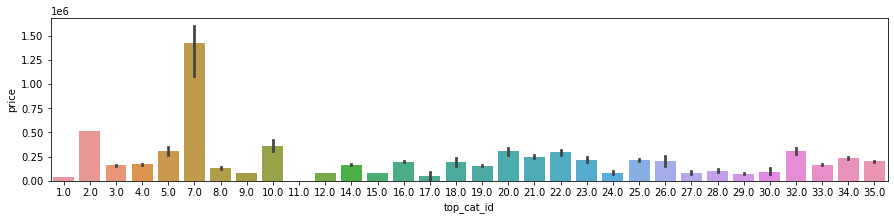

In [186]:
plt.figure(figsize=(15,3)) 
ax = sns.barplot(x="top_cat_id", y="price", data=baskets)


### top cat 7 is "baby food", hmmm, is this right?